<h1 align='center'> 파이썬과학프로그래밍기초 실습 5</h1>

<p style="text-align: right"> 2022.4.7.</p>


<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   나영훈          학번:    20185124         학과(전공):  빅데이터 전공
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 4월 13일 (수) 오후 6:00까지 최종본을 SmartLEAD에 제출


In [2]:
import sys
sys.version

'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

## 지난 주 문제 1.
'fake_student_records.csv' 파일에서 입학연도별 학생 수를 구하고 막대 그래프로 그려라. 단, 가로 축은 입학연도가 오름차순으로 정렬되어야 한다.

다음과 같은 그래프가 나오면 된다.

![studnets_per_school_year](students_per_school_year_graph.png)

{2026: 7, 2033: 4, 2031: 16, 2027: 9, 2030: 8, 2032: 7, 2028: 10, 2029: 9, 2025: 6}


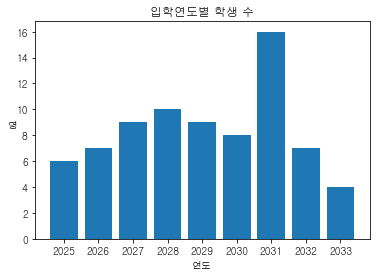

In [3]:
import csv
import matplotlib.pyplot as plt


students_per_admission_year = dict()


with open('fake_student_records.csv', mode='r', encoding='utf-8') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        admission_year = int(row['학번'][:4]) 
        # print(admission_year)
        if admission_year in students_per_admission_year:
            students_per_admission_year[admission_year] += 1

        else:
            students_per_admission_year[admission_year] = 1

print(students_per_admission_year)

sorted_students_per_admission_year = {}
for year in sorted(students_per_admission_year): # sorted(students_per_admission_year) 는 키만 반환함.
    sorted_students_per_admission_year[year] = students_per_admission_year[year]
sorted_students_per_admission_year

plt.rcParams["font.family"] = 'gulim'
plt.bar(range(len(sorted_students_per_admission_year)), sorted_students_per_admission_year.values())
plt.xticks(range(len(sorted_students_per_admission_year)), sorted_students_per_admission_year.keys(), rotation=0)
plt.xlabel('연도')
plt.ylabel('명', rotation=0)
plt.title('입학연도별 학생 수')
plt.savefig('students_per_school_year_graph.png')
plt.show()

## 지난 주 문제 2.
'fake_student_records.csv' 파일을 일고, 각 학생별로 과제 점수의 최소 점수를 제외한 7 번의 점수의 평균을 추가하여 출력하라. 단 평균 점수는 소숫점 세째 자리에서 반올림하여 둘째 자리까지만 기록한다.
 
예를 들어서, 첫 학생의 기록을 보면 다음과 같다.

```
{'이름': '길은영', '학번': '20267377', '소속': '일본학과', '학년': '3', '과제1': 61, '과제2': 69, '과제3': 46, '과제4': 79, '과제5': 57, '과제6': 77, '과제7': 56, '과제8': 65}
```
8 번의 과제 점수의 최솟값은 과제3의 46이고, 과제3을 제외한 나머지 과제 7 개의 점수의 합은 464이다.
464 / 7 = 66.28571428571429이고, 소숫점 세째 자리에서 반올림한 결과는 66/29이므로, 다음과 같이 출력되어야 한다.

```
{'이름': '길은영', '학번': '20267377', '소속': '일본학과', '학년': '3', '과제1': 61, '과제2': 69, '과제3': 46, '과제4': 79, '과제5': 57, '과제6': 77, '과제7': 56, '과제8': 65, '평균': 66.29}
```

참고로, 첫 다섯 학생의 기록은 다음과 출력되어야 한다.
```
{'이름': '길은영', '학번': '20267377', '소속': '일본학과', '학년': '3', '과제1': 61, '과제2': 69, '과제3': 46, '과제4': 79, '과제5': 57, '과제6': 77, '과제7': 56, '과제8': 65, '평균': 66.29}
{'이름': '임희윤', '학번': '20337377', '소속': '심리학과', '학년': '2', '과제1': 76, '과제2': 62, '과제3': 62, '과제4': 64, '과제5': 77, '과제6': 100, '과제7': 51, '과제8': 94, '평균': 76.43}
{'이름': '류준산', '학번': '20266173', '소속': '경제학과', '학년': '2', '과제1': 98, '과제2': 84, '과제3': 79, '과제4': 87, '과제5': 70, '과제6': 97, '과제7': 89, '과제8': 52, '평균': 86.29}
{'이름': '한성빈', '학번': '20314864', '소속': '경제학과', '학년': '3', '과제1': 75, '과제2': 63, '과제3': 59, '과제4': 81, '과제5': 83, '과제6': 90, '과제7': 93, '과제8': 71, '평균': 79.43}
{'이름': '김화원', '학번': '20277416', '소속': '경영학과', '학년': '3', '과제1': 45, '과제2': 90, '과제3': 86, '과제4': 94, '과제5': 94, '과제6': 52, '과제7': 76, '과제8': 84, '평균': 82.29}
```


In [4]:
import csv
student_records = []
with open('fake_student_records.csv', mode='r', encoding='utf-8') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        total = 0
        min_score = 100
        score_count = 0
        for key in row.keys():
            if '과제' in key:
                row[key] = int(row[key])
                total += row[key]
                min_score = min(min_score, row[key])
                score_count += 1
        total = total - min_score
        row['평균'] = round(total/(score_count-1), 2)
        print(row)
        student_records.append(row)


{'이름': '길은영', '학번': '20267377', '소속': '일본학과', '학년': '3', '과제1': 61, '과제2': 69, '과제3': 46, '과제4': 79, '과제5': 57, '과제6': 77, '과제7': 56, '과제8': 65, '평균': 66.29}
{'이름': '임희윤', '학번': '20337377', '소속': '심리학과', '학년': '2', '과제1': 76, '과제2': 62, '과제3': 62, '과제4': 64, '과제5': 77, '과제6': 100, '과제7': 51, '과제8': 94, '평균': 76.43}
{'이름': '류준산', '학번': '20266173', '소속': '경제학과', '학년': '2', '과제1': 98, '과제2': 84, '과제3': 79, '과제4': 87, '과제5': 70, '과제6': 97, '과제7': 89, '과제8': 52, '평균': 86.29}
{'이름': '한성빈', '학번': '20314864', '소속': '경제학과', '학년': '3', '과제1': 75, '과제2': 63, '과제3': 59, '과제4': 81, '과제5': 83, '과제6': 90, '과제7': 93, '과제8': 71, '평균': 79.43}
{'이름': '김화원', '학번': '20277416', '소속': '경영학과', '학년': '3', '과제1': 45, '과제2': 90, '과제3': 86, '과제4': 94, '과제5': 94, '과제6': 52, '과제7': 76, '과제8': 84, '평균': 82.29}
{'이름': '강화윤', '학번': '20278703', '소속': '생명과학과', '학년': '3', '과제1': 77, '과제2': 60, '과제3': 73, '과제4': 87, '과제5': 56, '과제6': 88, '과제7': 93, '과제8': 75, '평균': 79.0}
{'이름': '나동호', '학번': '20307508', '소속': '의과학융합전공', '학

## 예제 1.
아래 셀에 적힌 프로그램에서 글로벌 변수는 무엇인가?

**답**: a,b,c 이다. 여기서 a는 func1(x)에서 선언된 지역변수가 아닌 main body에서 정의된 a이다. 둘의 id를 찍어보면 다른 것을 알 수 있다.

- main body에서 정의가 되었기 때문.

In [7]:
def func1(x):
    x = x + 1
    a = 15
    print("local variable a : ", id(a))
    print('x', x)
    print('a', a)
    print('b', b)
    

a = 4
print("global variable a : ", id(a))
b = 10
c = 5
func1(c)


global variable a :  2972511201680
local variable a :  2972511202032
x 6
a 15
b 10


## 예제 2.
아래 셀에 적힌 프로그램에서 마지막 출력이 16 16이 아닌 4 16이 되는 이유를 설명하라.

**답**: 
``` python:
square Function 내부의 ans는 Local variable, Main body에 정의된 ans는 Global variable이다.
square 함수의 Argument로 들어가는 ans는 gloabal variable이므로 square 함수의 parameter x는 4가 된다. 
local variable인 ans는 4*4 의 값을 가진 지역변수로 새로 만들어진다. global variable ans와는 주소값이 다르기 때문에 헷갈리면 안된다.
square의 반환값은 16이 되며 result에 전달된다.
마지막 출력문에서는 global variable ans를 출력하므로출력은 4와 16이 된다.

```

In [9]:
def square(x):
    ans = x*x
    print("In square function:")
    print('x =', x)
    print('y =', y)
    print('ans =', ans)
    return ans

y = 5
ans = 4
result = square(ans)
print("In main body:")
print(ans, result)

In square function:
x = 4
y = 5
ans = 16
In main body:
4 16


## 예제 3.
리스트를 입력받아 리스트의 원소 중에 정수와 실수의 합을 반환하는 함수를 작성하라. 리스트의 원소로 리스트나 튜플이 있는 경우는 합을 계산할 때 제외한다.

작성된 함수를 이용해서 아래 리스트에 있는 숫자들의 합을 구하라.

```
x1 = [1, 3, 5, 7, 9]                     # 25
x2 = ["abc", [3, 5], 3.5, 2+3j, 4.5, 10] # 18.0
x3 = []                                  # 0
```

In [12]:
def number_sum(lst):
    total = 0
    for e in lst:
        if type(e) == int or type(e) == float:
            total += e
    return total

x1 = [1, 3, 5, 7, 9]                     # 25
x2 = ["abc", [3, 5], 3.5, 2+3j, 4.5, 10] # 18.0
x3 = []                                  # 0

print(number_sum(x1))
print(number_sum(x2))
print(number_sum(x3))

25
18.0
0


## 예제 4.
리스트 메쏘드 중에 append는 다음과 같은 기능을 한다.
```
Help on method_descriptor:

append(self, object, /)
    Append object to the end of the list.
```

In [13]:
lst = [1, 2, 3]
lst.append('s')
lst

[1, 2, 3, 's']

리스트 메쏘드를 사용하지 않고 이와 같은 기능을 하는 함수를 다음과 같이 만들 수 있다.

In [14]:
def list_append(lst, obj):
    print(id(lst))

    lst += [obj]
    
lst = [1, 2, 3]
print(id(lst))

list_append(lst, 's')
lst

2972631702464
2972631702464


[1, 2, 3, 's']

In [15]:
lst1 = [1, 2, 3]
lst2 = lst1.copy()

lst1.append('a') == list_append(lst2, 'a')

2972631942912


True

여기에서 list_append 함수에서 parameter인 lst의 값을 수정했는데도 global 변수인 lst의 내용이 변경되었다. 그 이유를 설명하라.

**답**: 
``` python:
파이썬은 함수에서 값을 전달할 때 객체를 전달하는 것이 아닌 객체의 ID를 전달을 한다. 
따라서 list_append의 Argument로 lst를 전달하면 lst의 id가 전달이 된다.
list_append(lst, obj)에서 lst의 주소와 Argument로 전달받은 lst의 주소는 동일하다.
그 아래줄의 lst +=[obj] 이므로, 새로운 local variable을 만드는 것이 아닌 동일한 주소에 obj 값을 list로 추가해주기 때문에 
[1, 2, 3, 's'] 가 된다.
```

아래 셀의 프로그램이 위의 프로그램과 결과가 다른 이유를 생각해 보라.

- 파이썬에서 Argument 가 주어지면 parameter로 주소가 전달이 된다.
- lst = .. 을 만들어 버리면 local variable에 새로운 변수가 생성이 된다.
- `함수에 mutable 객체가 전달이 되면 수정 된 것이 유지 될 수 있게 만들어야한다.`

In [16]:
def list_append_2(lst, obj):
    print(id(lst)) # 아싸 맞았당.
    lst = lst + [obj]
    print(lst)

lst = [1, 2, 3]
print(id(lst))

list_append_2(lst, 's')
lst

2972616238592
2972616238592
[1, 2, 3, 's']


[1, 2, 3]

## 예제 5.
다음 lst의 항목 중에서 iterable만을 항목으로 갖는 새로운 리스트 lst_with_iterables 를 만들어라.

어떤 객체가 iterable 객체인지 확인하는 방법은 collections package의 Iterable class를 이용한다.

In [21]:
# bool type은 정수형의 sub class? sub type? 이므로 True 반환.
isinstance(True, int)

True

In [22]:
import collections
isinstance('abc', collections.Iterable)

True

In [23]:
import collections
isinstance((3,4), collections.Iterable)

True

In [24]:
import collections
isinstance(3, collections.Iterable)

False

In [25]:
lst = ['abc', [1,2,3], ('abc', 3), {3, 5}, {'a':1, 'b':2}, 35]
lst_with_iterables = [e for e in lst if (isinstance(e, collections.Iterable))]
print(lst_with_iterables)

['abc', [1, 2, 3], ('abc', 3), {3, 5}, {'a': 1, 'b': 2}]


## 예제 6.
리스트 메쏘드 중에서 extend 메쏘드와 같은 기능을 하는 list_method 함수를 만들고 몇 가지 예를 시험하여 리스트 메쏘드와 기능이 같은지 검증하라. 단, 리스트 메쏘드는 사용하면 안된다.

In [26]:
# 참고
a = [1, 2, 3]
b = [4, 5, 6]
a.extend(b)
print(a)
a.extend('abc')
print(a)
a.extend((3,4))
print(a)
a.extend({3,4})
print(a)
a.extend({'a':1, 'b':2})
print(a)


[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 'a', 'b', 'c']
[1, 2, 3, 4, 5, 6, 'a', 'b', 'c', 3, 4]
[1, 2, 3, 4, 5, 6, 'a', 'b', 'c', 3, 4, 3, 4]
[1, 2, 3, 4, 5, 6, 'a', 'b', 'c', 3, 4, 3, 4, 'a', 'b']


In [27]:
import collections
def list_extend(lst, x, /):
    if isinstance(x, collections.Iterable):
        lst+=x
    else:
        # raise TypeError("'int' object is not iterable")
        pass
    


a = [1, 2, 3]
b = [4, 5, 6]    
list_extend(a, b)
print(a)
list_extend(a, 'abc')
print(a)
list_extend(a, (3,4))
print(a)
list_extend(a, {3,4})
print(a)
list_extend(a, {'a':1, 'b':2})
print(a)
list_extend(a, 3)
print(a)

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 'a', 'b', 'c']
[1, 2, 3, 4, 5, 6, 'a', 'b', 'c', 3, 4]
[1, 2, 3, 4, 5, 6, 'a', 'b', 'c', 3, 4, 3, 4]
[1, 2, 3, 4, 5, 6, 'a', 'b', 'c', 3, 4, 3, 4, 'a', 'b']
[1, 2, 3, 4, 5, 6, 'a', 'b', 'c', 3, 4, 3, 4, 'a', 'b']


In [28]:
help(list.extend)

Help on method_descriptor:

extend(self, iterable, /)
    Extend list by appending elements from the iterable.



## 예제 7.
collections 모듈의 Counter 클래스는 Dict의 subclass로 hashable 객체의 개수를 세어서 반환한다.
- immutable 객체는 hashable

다음은 Counter class의 most_common 함수의 도움말이다.

```
most_common(self, n=None)
    List the n most common elements and their counts from the most
    common to the least.  If n is None, then list all element counts.
    
    >>> Counter('abracadabra').most_common(3)
    [('a', 5), ('b', 2), ('r', 2)]
```
위 도움말과 아래 프로그램 예제를 참조해서 이와 같은 기능을 하는 most_common_char_count 함수를 작성하고 테스트하는 프로그램을 작성하라.

단, sorted 함수는 사용해도 된다.

In [30]:
from collections import Counter
s = 'dajklvkdafjkd;ajfeqipjjfdas;fjkdsal;'
print("Given string: ", s)
print(Counter(s))
print("Most common four characters of the given string:")
print(Counter(s).most_common(4))

Given string:  dajklvkdafjkd;ajfeqipjjfdas;fjkdsal;
Counter({'j': 6, 'd': 5, 'a': 5, 'k': 4, 'f': 4, ';': 3, 'l': 2, 's': 2, 'v': 1, 'e': 1, 'q': 1, 'i': 1, 'p': 1})
Most common four characters of the given string:
[('j', 6), ('d', 5), ('a', 5), ('k', 4)]


Algorithm
1. 입력 문자열의 각 문자의 빈도 조사 --> dictionary로 만들기
2. dictionay의 value를 기준으로 sorting
3. if n == None:
       전체 dictionay를 tuple의 리스트로 반환
   else:
       빈도가 가장 큰 n 개를 tuple의 리스트로 반환

`sorted(d)` : 키 중심으로 Sortring
`sorted(d, key=d.get, reverse = True)` : Value 중심으로 sorting, reverse는 True하면 반대로

In [31]:
def most_common_char_count(s, n=None):
    counter = dict()
    
    for c in s:
        if c in counter:
            counter[c]+=1
        else:
            counter[c] = 1


    counter_tmp = sorted(counter, key = counter.get, reverse = True)
    result = [(k, counter[k]) for k in counter_tmp]
    return result[:n]
    
s = 'dajklvkdafjkd;ajfeqipjjfdas;fjkdsal;'
most_commons = most_common_char_count(s, 4)
print(most_commons)
print(most_common_char_count(s))

[('j', 6), ('d', 5), ('a', 5), ('k', 4)]
[('j', 6), ('d', 5), ('a', 5), ('k', 4), ('f', 4), (';', 3), ('l', 2), ('s', 2), ('v', 1), ('e', 1), ('q', 1), ('i', 1), ('p', 1)]


## 예제 8.

아래 함수는 password가 다음 조건을 만족하면  True를 그렇지 않으면 False를 반환한다.
아래 함수를 완성하라.
- 문자 수는 10 이상 15 이하여야 한다.
- 특수 문자는 "!", "@", "#", "^", "&", "\*" 중의 하나만 사용할 수 있다.
- 영어 소문자 알파벳, 대문자, 알파벳, 숫자가 사용될 수 있으면, 이 세 종류의 최소한 한 글자가 포함되어야 한다.

In [56]:
special_character = ['!', "@", "#", "^", "&", "\*"]

def is_passwd_valid(password):
    special_character_count = 0
    
    if not(len(password) >= 10 and len(password) <= 15):
        return False
    
    lower = False
    upper = False
    integer = False
    sp_character = False
    for i in range(len(password)):
        if password[i] in special_character:
            special_character_count+=1
            sp_character = True
            
            if special_character_count >= 2:
                return False
        
        elif password[i] >= 'a' and password[i] <= 'z': lower = True # 소문자가 하나 이상 들어오면 True로 바꿈
        elif password[i] >= 'A' and password[i] <= 'Z': upper = True # 대문자가 하나 이상  들어오면 True로 바꿈
        elif password[i] >= '1' and password[i] <= '9': integer = True # 숫자가 하나 이상 들어오면 True로 바꿈.

    if sp_character and lower and upper and integer: return True
    else: return False


password_list = ["Password!", "Password10", "password!11", "PASSWORD!!12", "PAssWORD!#@13", "password1234",
                "longlongPassword", "TruePassword1!"]
                 
for lst in password_list:
    print(lst, "is", is_passwd_valid(lst))

Password! is False
Password10 is False
password!11 is False
PASSWORD!!12 is False
PAssWORD!#@13 is False
password1234 is False
longlongPassword is False
TruePassword1! is True


## 예제 9. 
List와 Set의 데이터구조 차이 때문에 각 객체 내의 원소를 검색하는데 소요되는 시간에 차이가 있다.

아래의 세 셀을 실행하면 두 구조를 이용해서 데이터를 처리하는 속도 차이를 비교할 수 있다.

In [57]:
import random
random.seed(0)
N = 200
lst = list(range(N+1))
s = set(lst)

In [58]:
%%timeit

for i_ in range(50):
    n = random.randint(0, 2*N)
    n in lst

74.1 µs ± 174 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [62]:
from timeit import timeit
for k in range(3):
    a = """
print(k+1)
    """
    avg_time = timeit(a,  globals=globals(), number=1)
    print(avg_time)

1
3.070000093430281e-05
2
1.2099997547920793e-05
3
9.800001862458885e-06


그러나 timeit 모듈을 사용해도 평균 사용시간을 구할 수 있다.

timeit 모듈의 사용법은 [한글설명](https://docs.python.org/ko/3.9/library/timeit.html) 또는 [영문설명](https://docs.python.org/3.9/library/timeit.html)을 참조하라

In [137]:
from timeit import timeit
import matplotlib.pyplot as plt
import random

def search_in_an_iterable(lst, randoms, n):
    for _ in range(n):
        for e in randoms:
            e in lst

            
reps = 100
avg_time_list = {k:0 for k in range(100, 1001, 100)}
avg_time_set = {k:0 for k in range(100, 1001, 100)}
for N in range(100, 1001, 100):
    # print(N)

    lst = list(range(N+1))
    s = set(lst)
    randoms = [random.randint(0, 2*N) for _ in range(100)]
    # print(randoms)


    my_code_list = """
search_in_an_iterable(lst, randoms, 10)
    """
    my_code_set = """
search_in_an_iterable(s, randoms, 10)
    """

    
    avg_time_list[N] = timeit(my_code_list,  globals=globals(), number=reps) / reps
    avg_time_set[N]  = timeit(my_code_set,  globals=globals(), number=reps) / reps
avg_time_list, avg_time_set

({100: 0.0004603800000040792,
  200: 0.0008957989999908022,
  300: 0.001374606000026688,
  400: 0.0017984629999409662,
  500: 0.002219563000035123,
  600: 0.0025997020000068007,
  700: 0.0031385579999914626,
  800: 0.0034168119999958436,
  900: 0.004148100000020349,
  1000: 0.004440270999984932},
 {100: 2.2800000006100164e-05,
  200: 2.1983999977237546e-05,
  300: 2.2395999985747038e-05,
  400: 2.3025999980745836e-05,
  500: 2.2108999983174725e-05,
  600: 2.319100000022445e-05,
  700: 2.1838000029674732e-05,
  800: 2.2536999967996962e-05,
  900: 2.2090999991632997e-05,
  1000: 2.275899998494424e-05})

### 같이 그렸을 때의 차이가 너무 심해 같이 그린 plt.plot 하나 , 따로 그린 plot 2개로 그려보았습니다.

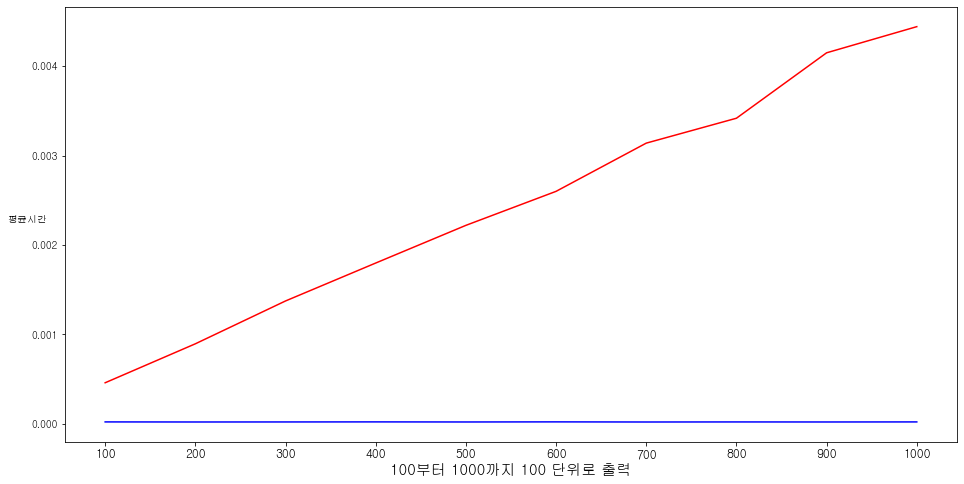

In [141]:
plt.figure(figsize=(16, 8))
plt.rcParams["font.family"] = "gulim"

plt.plot(avg_time_set.keys(), avg_time_set.values(), color = "blue") 
plt.plot(avg_time_list.keys(), avg_time_list.values(), color = "red") 
# 같이 그리기엔 차이가 너무 심함

plt.xticks(range(100, 1001, 100), fontsize = 12)
plt.xlabel("100부터 1000까지 100 단위로 출력", rotation="0", fontsize=15)
plt.ylabel("평균시간", rotation="0", fontsize=10)
plt.show()

#### 따로 그린 plt.plot

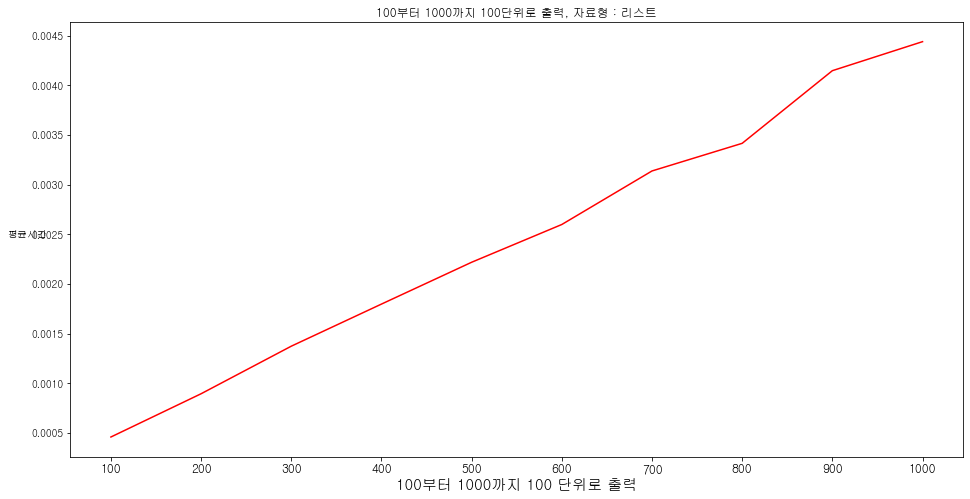

In [144]:
plt.figure(figsize=(16, 8))
plt.rcParams["font.family"] = "gulim"

# plt.plot(avg_time_set.keys(), avg_time_set.values(), color = "blue") 
plt.plot(avg_time_list.keys(), avg_time_list.values(), color = "red") 
# 같이 그리기엔 차이가 너무 심함

plt.xticks(range(100, 1001, 100), fontsize = 12)
plt.title("100부터 1000까지 100단위로 출력, 자료형 : 리스트")
plt.xlabel("100부터 1000까지 100 단위로 출력", rotation="0", fontsize=15)
plt.ylabel("평균시간", rotation="0", fontsize=10)
plt.show()

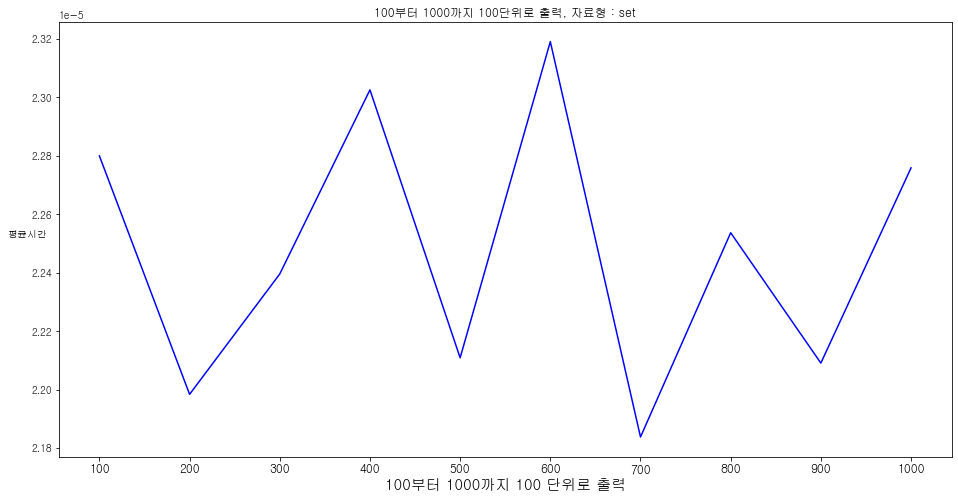

In [145]:
plt.figure(figsize=(16, 8))
plt.rcParams["font.family"] = "gulim"

plt.plot(avg_time_set.keys(), avg_time_set.values(), color = "blue") 
# plt.plot(avg_time_list.keys(), avg_time_list.values(), color = "red") 
# 같이 그리기엔 차이가 너무 심함

plt.title("100부터 1000까지 100단위로 출력, 자료형 : set")
plt.xticks(range(100, 1001, 100), fontsize = 12)
plt.xlabel("100부터 1000까지 100 단위로 출력", rotation="0", fontsize=15)
plt.ylabel("평균시간", rotation="0", fontsize=10)
plt.show()

N이 100, 200, 300, ..., 1000 일 때 리스트와 세트 객체에서 원소를 검색하는데 소요되는 평균 시간을 비교하여 막대 그래프로 표시하라.

## 문제 1.


<ol>
<li> 양의 정수를 parameter로 받아들여서 완전수이면 True를, 아니면 False를 반환하는 함수 is\_a\_perfect\_number(n)을 작성하라. 
   parameter가 정수가 아니거나 0 또는 음의 정수이면 False를 반환해야 한다.

    

<li> 문제 1에서 작성한 함수를 이용해서 1과 10000 사이의 모든 완전수를 콘솔에 출력하는 프로그램을 작성하라.

    답은 6, 28, 496, 8128

<li> 문제 2에서 완전수를 찾으려고 하는 정수 (b번 문제에서는 10000)가 다음과 같을 때 각 정수에 대해서 문제 b)에서 작성한 프로그램이 실행되는 평균 시간을 측정해서 비교하는 막대 그래프를 그리는 프로그램을 작성하라.
    
  -  N = range(500, 10001, 500)
</ol>

참고: [위키피디아의 완전수 설명](https://ko.wikipedia.org/wiki/%EC%99%84%EC%A0%84%EC%88%98)을 참조하라.

In [107]:
%%timeit
import matplotlib.pyplot as plt


def is_a_perfect_number(n):
    
    if type(n) != int or n<0:
        return False
    
    
    li = []
    for i in range(1,n):
        if (n%i == 0):
            li.append(i)

    if sum(li) == n:
        return True
    else:
        return False
    
for n in range(1, 10001):
    if is_a_perfect_number(n):
        # print(n)
        pass

1.84 s ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


6 28 496 8128 
Problem2 END
6 28 496 n =  500 time =  0.0038291999999273685
6 28 496 n =  1000 time =  0.015622500000063155
6 28 496 n =  1500 time =  0.037232399999993504
6 28 496 n =  2000 time =  0.06677489999992758
6 28 496 n =  2500 time =  0.10797370000000228
6 28 496 n =  3000 time =  0.16686909999998534
6 28 496 n =  3500 time =  0.2177438000003349
6 28 496 n =  4000 time =  0.28615669999999227
6 28 496 n =  4500 time =  0.36709520000022167
6 28 496 n =  5000 time =  0.4527122999998028
6 28 496 n =  5500 time =  0.5467375999996875
6 28 496 n =  6000 time =  0.6474901999999929
6 28 496 n =  6500 time =  0.761848099999952
6 28 496 n =  7000 time =  0.8834160000001248
6 28 496 n =  7500 time =  1.0196928000000298
6 28 496 n =  8000 time =  1.170927600000141
6 28 496 8128 n =  8500 time =  1.3134086000000025
6 28 496 8128 n =  9000 time =  1.4854291999999987
6 28 496 8128 n =  9500 time =  1.6522180000001754
6 28 496 8128 n =  10000 time =  1.830247099999724
{500: 0.003829199999927

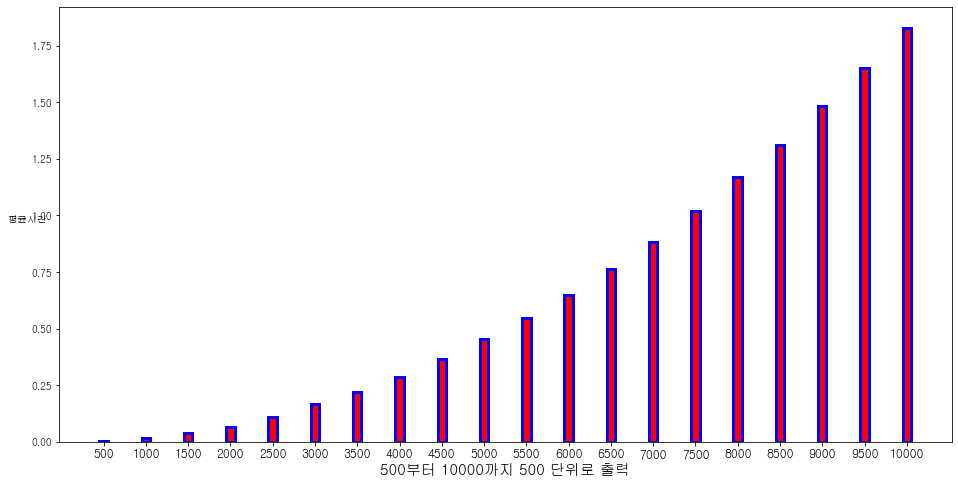

In [60]:
# %%timeit

from timeit import timeit
import matplotlib.pyplot as plt


def is_a_perfect_number(n):
    
    if type(n) != int or n<0:
        return False
    
    
    li = []
    for i in range(1,n):
        if (n%i == 0):
            li.append(i)

    if sum(li) == n: return True
    else: return False
    

# print("Problem1")
# 문제 1 
# print(is_a_perfect_number(28))
# print(is_a_perfect_number(28.0))
    
for n in range(1, 10000):
    if is_a_perfect_number(n):
        print(n, end = " ")

        
print("\nProblem2 END")

limit = 10001
time_dit = {n:0 for n in range(500, limit, 500)}
for n in range(500, limit, 500):
    time_check_list = """
for cnt in range(1 , n+1):
    if is_a_perfect_number(cnt):
        print(cnt, end = " ")
        """
    
    time_check = timeit(time_check_list, globals=globals(), number=1)
    print("n = ", n, "time = ", time_check)
    time_dit[n] = time_check
    
print(time_dit)
    
ㅍ

#### 박주영 학생이 이 완전수 구하는 문제를 더 빠르게 실행하는 법을 물어봐서 같이 개선하였습니다.

`[N = 10000][avg_time = 0.026966599994921125]` N이 10000 일 때. 평균 시간은 0.027초 정도가 나왔습니다.
- 제가 시도한 가장 기본적인 방법은 N=10000 일 때 평균 시간은 1.82초 정도 소요되었습니다. 
- N이 10000일 때를 기준으로 대략 68배, 70배 정도 빠른 성능을 낼 수 있다는 것을 알았습니다.

================================= 2번 =================================
6
28
496
8128
[N = 500]
[avg_time = 0.000538609999784967]

[N = 1000]
[avg_time = 0.0013283799999044277]

[N = 1500]
[avg_time = 0.0021692299997084774]

[N = 2000]
[avg_time = 0.003124210000532912]

[N = 2500]
[avg_time = 0.0041162500005157195]

[N = 3000]
[avg_time = 0.0052961400004278405]

[N = 3500]
[avg_time = 0.006635599999572151]

[N = 4000]
[avg_time = 0.007854480000241892]

[N = 4500]
[avg_time = 0.00912854000052903]

[N = 5000]
[avg_time = 0.01059536000029766]

[N = 5500]
[avg_time = 0.011985049999930197]

[N = 6000]
[avg_time = 0.013377790000231472]

[N = 6500]
[avg_time = 0.014988820000144187]

[N = 7000]
[avg_time = 0.016372730000148293]

[N = 7500]
[avg_time = 0.018137150000256952]

[N = 8000]
[avg_time = 0.01990561999991769]

[N = 8500]
[avg_time = 0.02154436999990139]

[N = 9000]
[avg_time = 0.023036180000053717]

[N = 9500]
[avg_time = 0.024819679999927756]

[N = 10000]
[avg_time = 0.0266321399998560

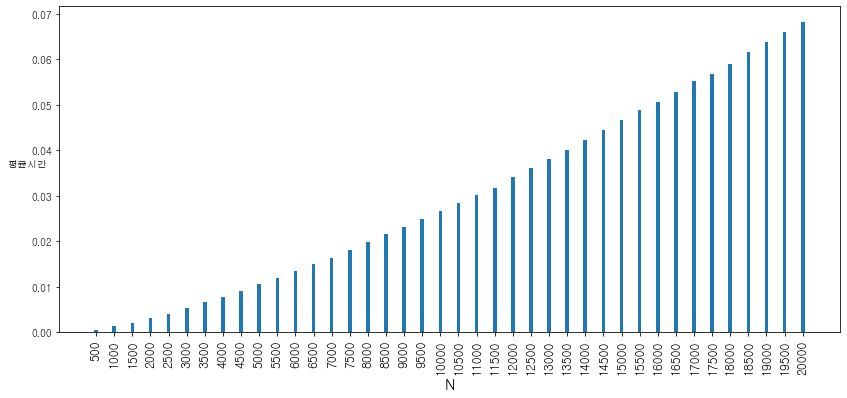

In [148]:
from timeit import timeit
import matplotlib.pyplot as plt, math

# 1번
def is_a_perfect_number(n):
    
    li = [1,] # 2부터 시작하기 때문에 리스트 초기화를 1로 해둠.
    
    # 약수를 구할 때 시간복잡도를 줄이기 위해서는 제곱근까지만 구하면 됨.
    # 근데 파이썬은 반복문 안에 float형이 들어가면 안됨.
    # -> round 후 + 1을 통해 
    for i in range(2, round(math.sqrt(n))+1):
        if n % i == 0:
            li.append(i)
            
            if (n//i != i):
                li.append(n//i)
                
    if sum(li) == n:
        return True
    else:
        return False



print("================================= 2번 =================================")
for n in range(2, 10000): # 1은 어짜피 완전수가 아니니까 1 제외하고 하기.
    if is_a_perfect_number(n):
        print(n)
    

# 3번
times = []
N = range(500, 20001, 500)
for k in N:
    print(f"[N = {k}]")
    my_code_perfect_number = """
for n in range(2, k+1):
    if is_a_perfect_number(n):
        pass
    """
    rep = 10
    avg_time = timeit(my_code_perfect_number,  globals=globals(), number=rep) / rep
    times.append(avg_time)
    print(f'[avg_time = {avg_time}]', end= '\n\n')
    
plt.figure(figsize=(14, 6)) #도표의 사이즈를 조정하는 함수
plt.rcParams["font.family"] = "gulim"

plt.bar(N, times ,100)

plt.xticks(N, fontsize = 12, rotation = "90")

plt.xlabel("N", rotation="0", fontsize=15)
plt.ylabel("평균시간", rotation="0", fontsize=10)
plt.show()